In [5]:
#공통 코드
import numpy as np
import pandas as pd

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3
# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

import seaborn as sns
import scipy as sp
import scipy.stats

In [1]:
#머신 러닝에 사용할 데이터 가져오기
import seaborn as sns
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
#featrue matrix 와 target을 분리
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
print(X_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


(50,)
[[  4.967]
 [ -1.383]
 [  6.477]
 [ 15.23 ]
 [ -2.342]
 [ -2.341]
 [ 15.792]
 [  7.674]
 [ -4.695]
 [  5.426]
 [ -4.634]
 [ -4.657]
 [  2.42 ]
 [-19.133]
 [-17.249]
 [ -5.623]
 [-10.128]
 [  3.142]
 [ -9.08 ]
 [-14.123]
 [ 14.656]
 [ -2.258]
 [  0.675]
 [-14.247]
 [ -5.444]
 [  1.109]
 [-11.51 ]
 [  3.757]
 [ -6.006]
 [ -2.917]
 [ -6.017]
 [ 18.523]
 [ -0.135]
 [-10.577]
 [  8.225]
 [-12.208]
 [  2.089]
 [-19.597]
 [-13.282]
 [  1.969]
 [  7.385]
 [  1.714]
 [ -1.156]
 [ -3.011]
 [-14.785]
 [ -7.198]
 [ -4.606]
 [ 10.571]
 [  3.436]
 [-17.63 ]] [  9.258  -4.15   11.277  30.072  -4.652  -4.751  29.745  14.039 -10.058
  10.827 -10.748 -10.5     2.733 -40.462 -34.686 -10.89  -21.329   6.288
 -18.799 -29.891  28.674  -3.977   0.315 -27.93  -14.507   2.04  -23.933
   6.215 -12.921  -8.821 -13.254  36.403   0.208 -22.672  14.642 -25.919
   4.093 -39.865 -28.093   3.45   13.866   3.396  -4.015  -7.35  -30.963
 -16.86   -9.917  20.403   5.877 -36.495]
[2.01]
-0.9589782612132041


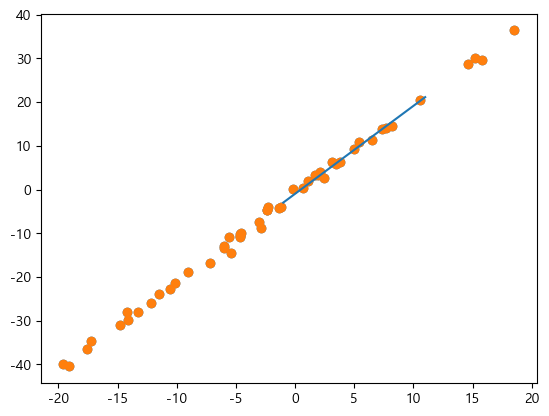

In [16]:
#선형 회귀수행

#1.데이터 수집
rng = np.random.RandomState(42)
X = 10 * rng.randn(50)
y = 2 * X -1 + rng.randn(50)
plt.scatter(X,y)

#2.모델을 선택하고 인스턴스를 생성
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

#3.모델 훈련
#특징 벡터는 2차원 배열이어야함
#1차원 배열을 2차원 배열로 변경하고자 하면 reshape를 이용해도 되고
#열을 하나 추가해서 2차원으로 만들어도 됨
#여기서는 2차원으로 변경한 것
print(X.shape)
print(X[:, np.newaxis], y)
model.fit(X[:, np.newaxis], y)
print(model.coef_) #기울기 - slope
print(model.intercept_) #절편 - intercept

#4.예측에 사용할 데이터 생성
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(X, y)
plt.plot(Xfit, yfit)

## 숫자 이미지 분류

In [17]:
#1.데이터 수집
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.images.shape)
#데이터의 개수1797, 8*8짜리 이미지


(1797, 8, 8)


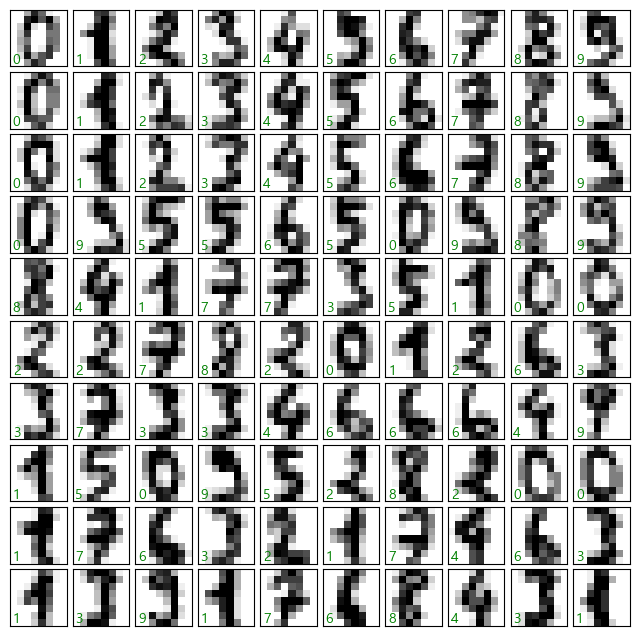

In [21]:
#2.데이터 확인 - 이미지 출력
fig, axes = plt.subplots(10, 10, figsize=(8,8), 
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
        transform=ax.transAxes, color='green')

In [23]:
#3. 특징 배열과 타겟을 생성
X = digits.data
print(X.shape)

y = digits.target
print(y.shape)

#훈련 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)
print(Xtrain.shape)
print(Xtest.shape)
help(train_test_split)

(1797, 64)
(1797,)
(1347, 64)
(450, 64)
Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of te

In [24]:
#4.분류 모델을 선택해서 훈련
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
#예측
y_model = model.predict(Xtest)

In [25]:
#5. 정확도 확인
from sklearn.metrics import accuracy_score
#실제 값과 예측한 값을 대입해서 정확도 확인
accuracy_score(ytest, y_model)

0.856

Text(114.9222222222222, 0.5, 'true value')

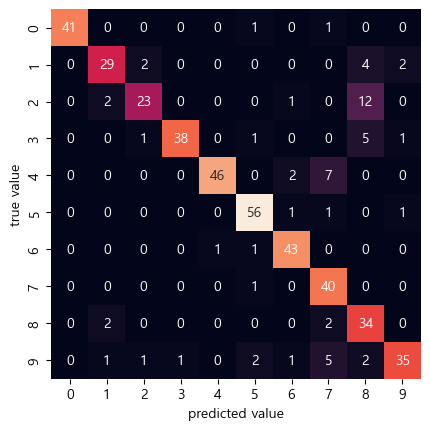

In [26]:
#6. 오차 행렬
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

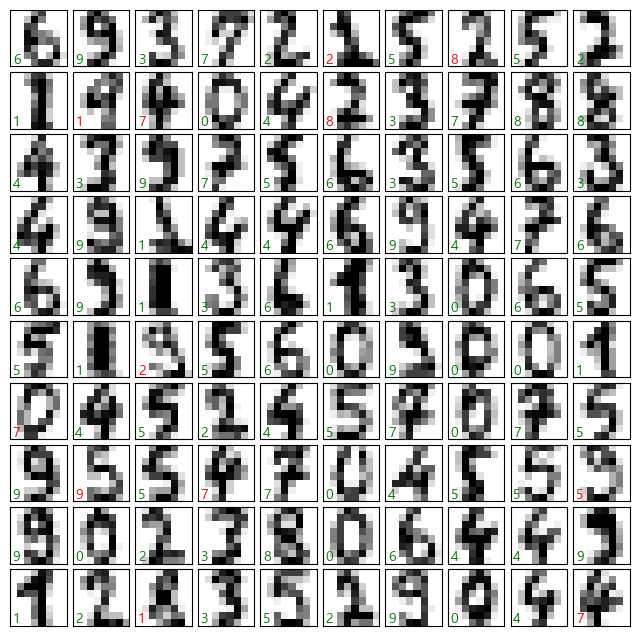

In [27]:
#7. 실제 이미지에서 잘못 분류된 데이터 확인
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = Xtest.reshape(-1, 8, 8)
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
        transform=ax.transAxes,
        color='green' if (ytest[i] == y_model[i]) else 'red')

## 붓꽃 데이터의 PCA(주성분 분석)

In [29]:
from sklearn.decomposition import PCA 
model = PCA(n_components=2) # 2개의 주성분 분석
hyperparameters #이 경우는 훈련 데이터와 테스트 데이터를 분할하지 않음
X_2D = model.transform(X_iris) 
#주성분 결과를 원본 데이터에 반영
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

NameError: name 'hyperparameters' is not defined

## 붓꽃 데이터를 활용한 군집

In [30]:
from sklearn.mixture import GaussianMixture 
model = GaussianMixture(n_components=3, covariance_type='full')

## 캘리포니아 주택 가격 모델

In [31]:
import pandas as pd
#1.데이터 가져오기
housing = pd.read_csv("../python_machine_learning-main/data/housing.csv")
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0          8.325            452600.0        NEAR BAY  
1      2401.0      1138.0          8.301            358500.0        NEAR BAY  
2       496.0       177.0          7.257            352100.0        NEAR BAY  
3       558.0       219.0          5.643            341300.0        NEAR BAY  
4       565.0       259.0          3.846            342200.0        NEAR BAY  


In [ ]:
#2.데이터 탐색
housing.info()
#총 데이터 개수는 20640개
#속성은 10개
#ocean_proximity을 제외하고는 전부 실수
#total_bedrooms은 결측치 존재

In [ ]:
#범주형 가능성이 있는 데이터를 확인 
print(housing)
...

In [32]:
#기술 통계량 확인
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.00,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.54,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.33,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.00,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.00,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.00,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.00,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.00,15.000,500001.000


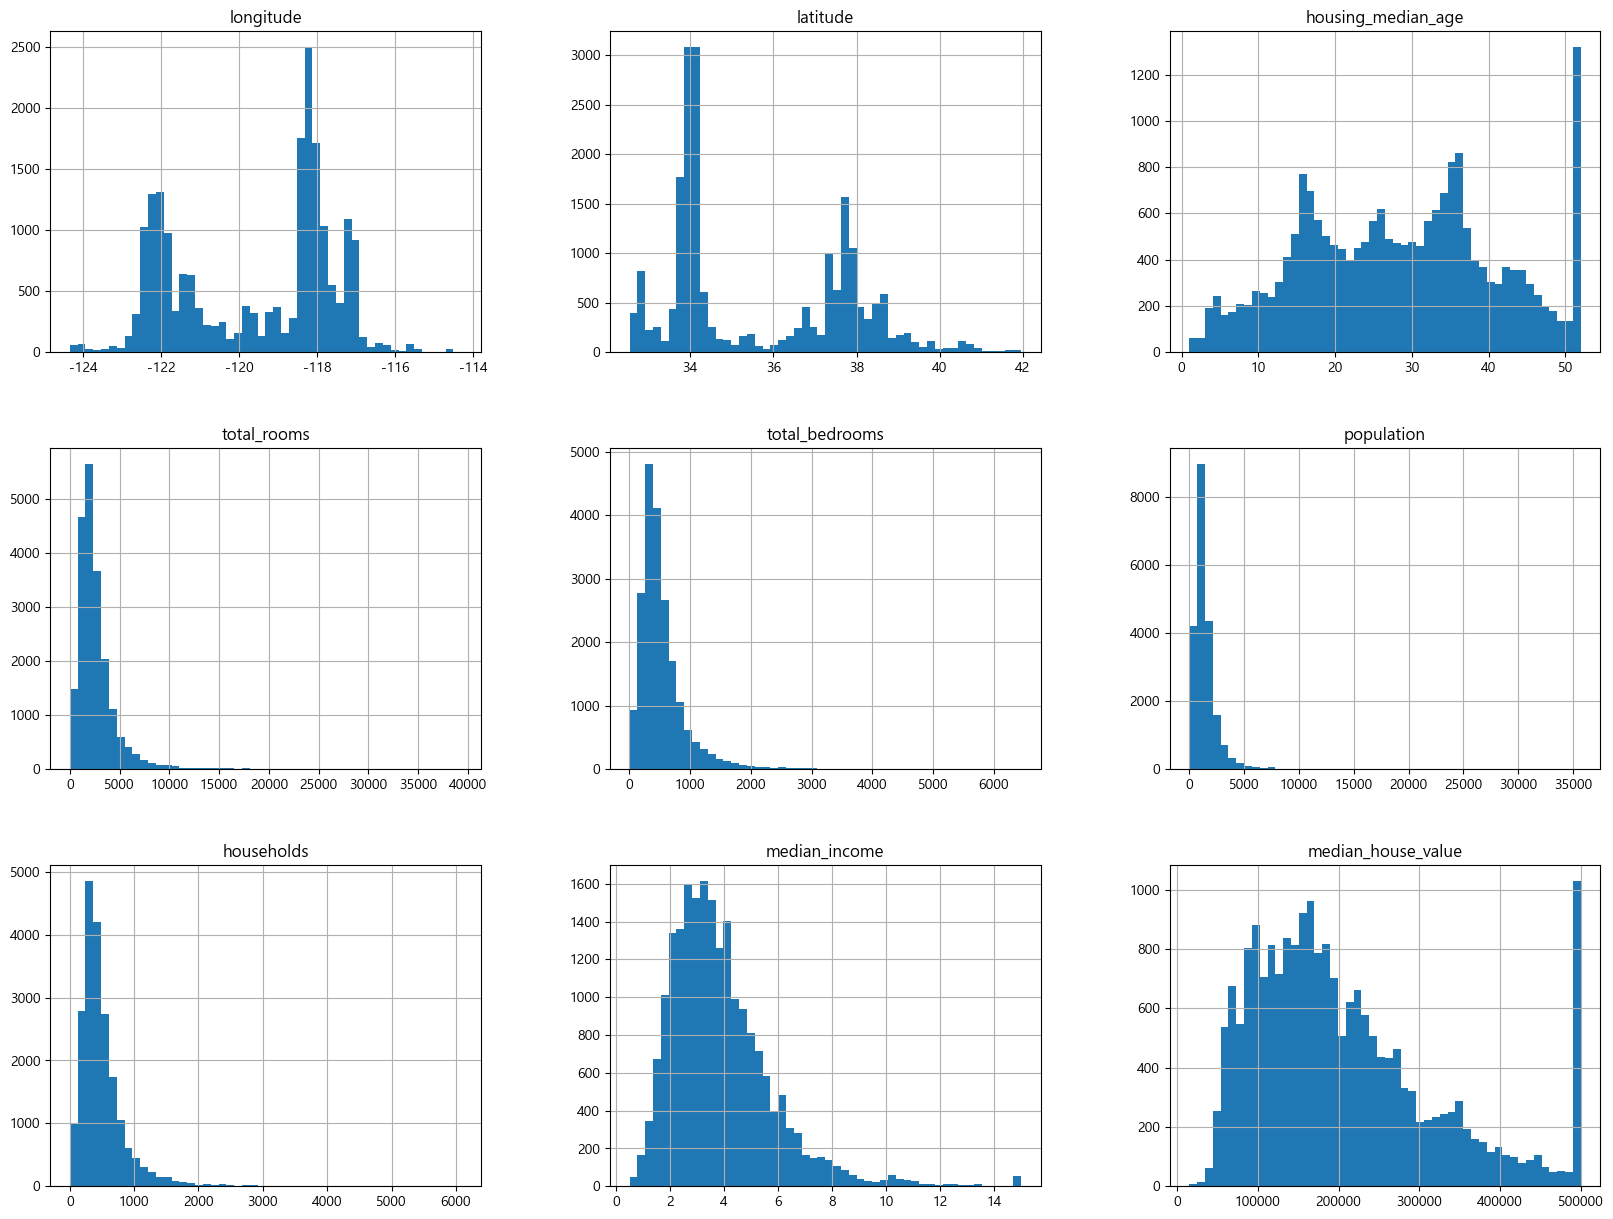

In [34]:
#데이터의 분포 확인
housing.hist(bins=50, figsize=(20, 15))
#이미지 저장
plt.savefig('histogram', format='png', dpi=300)
plt.show()
#데이터의 분포를 확인해서 꼬리가 길고, 한쪽으로 많이 쏠려있는 데이터의 경우
#패턴을 찾기 어렵기 때문에 좀 더 분포가 되도록 조정할 필요가 있음
#각 속성의 단위가 다르면 좋은 모델이 만들어지기 어렵기 때문에 스케일링을 고려

In [35]:
#3. 테스트 데이터 만들기

#시드를 고정
np.random.seed(42)

#데이터와 테스트 데이터의 비율을 매개변수로 받아서 테스트 데이터에 리턴해주는 함수
def split_train_test(data, test_ratio):
    #랜덤한 숫자 인덱스를 생성
    shuffled_indices = np.random.permutation(len(data))
    #테스트 데이터의 크기 결정
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[train_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), len(test_Set))

NameError: name 'train_set_size' is not defined

In [ ]:
shuffled_indices

In [ ]:
#해시를 이용한 데이터 분할
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

#인덱스에 연산을 수행해서 테스트 데이터 생성 - 인덱스는 데이터의 순서이므로 불변
housing_sith_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

housing_with_id["id"] = housing["longtitude"] * 1000 + housing["latitude"]


In [ ]:
#상관관계가 높은 데이터만 분포를 확인
housing.plot(kind='scatter', x='median_income', y="median")

In [ ]:
## 결측치 처리